In [1]:
import pandas as pd
raw_files = {"air_co2":         "../data/EDU-B57178B9-f4-5e-ab-60-84-4e/air_carbon_dioxide_ppm_T6713-Top.csv",
             "air_RH":          "../data/EDU-B57178B9-f4-5e-ab-60-84-4e/air_humidity_percent_SHT25-Top.csv",
             "air_temp_C":      "../data/EDU-B57178B9-f4-5e-ab-60-84-4e/air_temperature_celcius_SHT25-Top.csv",
             "water_ec_ms_cm":  "../data/EDU-B57178B9-f4-5e-ab-60-84-4e/water_electrical_conductivity_ms_cm_AtlasEC-Reservoir.csv",
             "water_pH":        "../data/EDU-B57178B9-f4-5e-ab-60-84-4e/water_potential_hydrogen_AtlasPH-Reservoir.csv",
             "water_temp_C":    "../data/EDU-B57178B9-f4-5e-ab-60-84-4e/water_temperature_celcius_AtlasTemp-Reservoir.csv"}

## Data parsing
Here, we're only pulling in data from one of the three machines. This machine was the most reliable network connection,
and thus has the most complete dataset.

#### Convert Raw data (csv files) into Pandas Data Frame

In [2]:
air_co2_df = pd.read_csv(raw_files["air_co2"])
air_RH_df = pd.read_csv(raw_files["air_RH"])
air_temp_C_df = pd.read_csv(raw_files["air_temp_C"])
water_ec_ms_cm_df = pd.read_csv(raw_files["water_ec_ms_cm"])
water_pH_df = pd.read_csv(raw_files["water_pH"])
water_temp_C_df = pd.read_csv(raw_files["water_temp_C"])

#### Convert `timestamp_utc` from string into actual timestamp

In [4]:
dateformat = "%Y-%m-%dT%H:%M:%SZ"
air_co2_df['timestamp_utc'] = pd.to_datetime(air_co2_df['timestamp_utc'], format=dateformat)
air_RH_df['timestamp_utc'] = pd.to_datetime(air_RH_df['timestamp_utc'], format=dateformat)
air_temp_C_df['timestamp_utc'] = pd.to_datetime(air_temp_C_df['timestamp_utc'], format=dateformat)
water_ec_ms_cm_df['timestamp_utc'] = pd.to_datetime(water_ec_ms_cm_df['timestamp_utc'], format=dateformat)
water_pH_df['timestamp_utc'] = pd.to_datetime(water_pH_df['timestamp_utc'], format=dateformat)
water_temp_C_df['timestamp_utc'] = pd.to_datetime(water_temp_C_df['timestamp_utc'], format=dateformat)


## Data Plots
Here we are plotting the data collected by the sensors. The only controlled part of the growing was the lighting, as well
as any cleaning/fertilizing of the water the plants were grown in. We don't have electronic records for when the
basil was harvested, and new seedlings were placed into the PFCs.

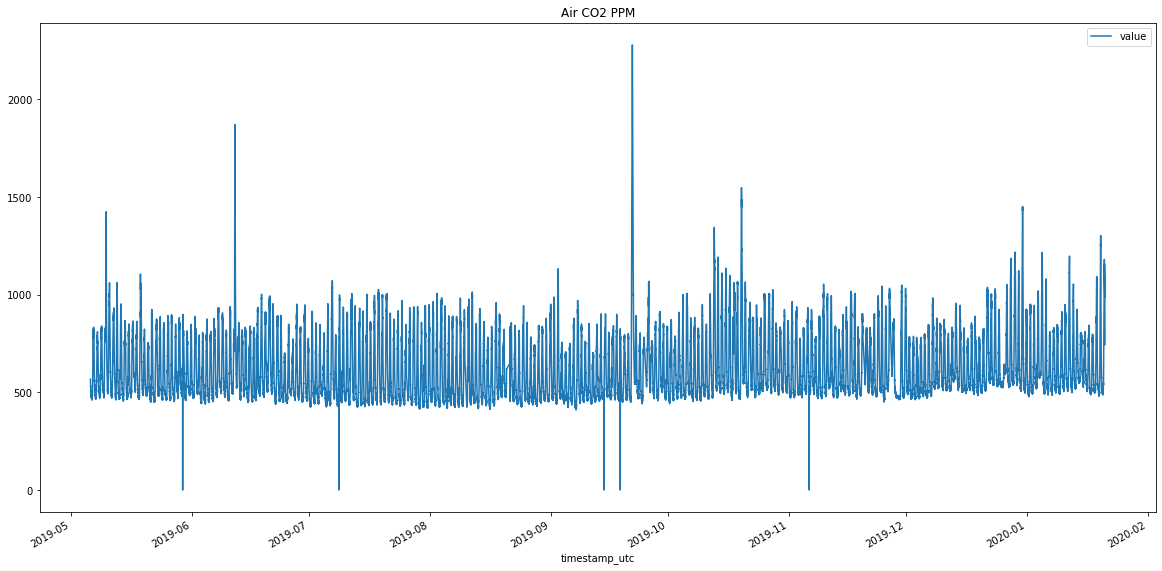

In [23]:
%matplotlib inline

ax = air_co2_df.plot(x='timestamp_utc',y='value', figsize=(20,10), title="Air CO2 PPM")
fig = ax.get_figure()
fig.savefig('../plots/air_co2_plot.png')

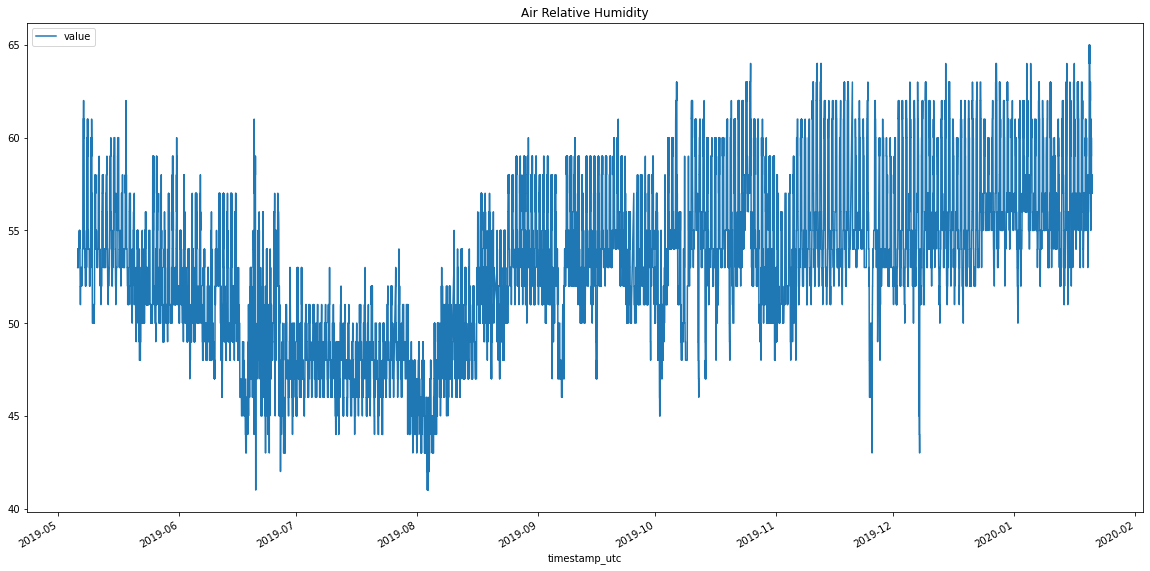

In [24]:
ax = air_RH_df.plot(x='timestamp_utc',y='value', figsize=(20,10), title="Air Relative Humidity")
fig = ax.get_figure()
fig.savefig('../plots/air_rh_plot.png')

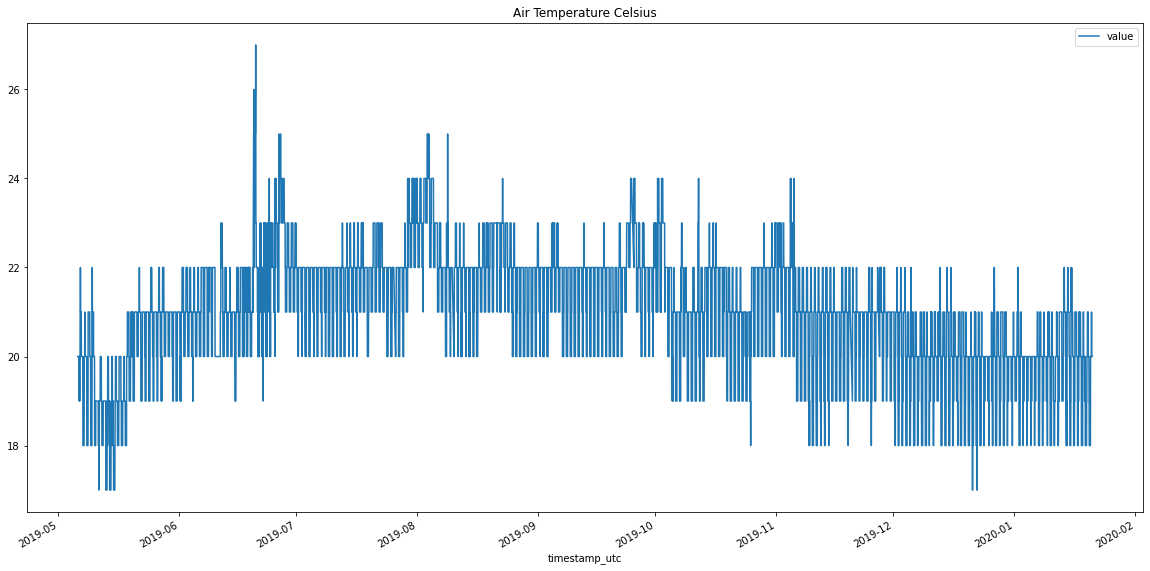

In [25]:
ax = air_temp_C_df.plot(x='timestamp_utc',y='value', figsize=(20,10), title="Air Temperature Celsius")
fig = ax.get_figure()
fig.savefig('../plots/air_temp_plot.png')

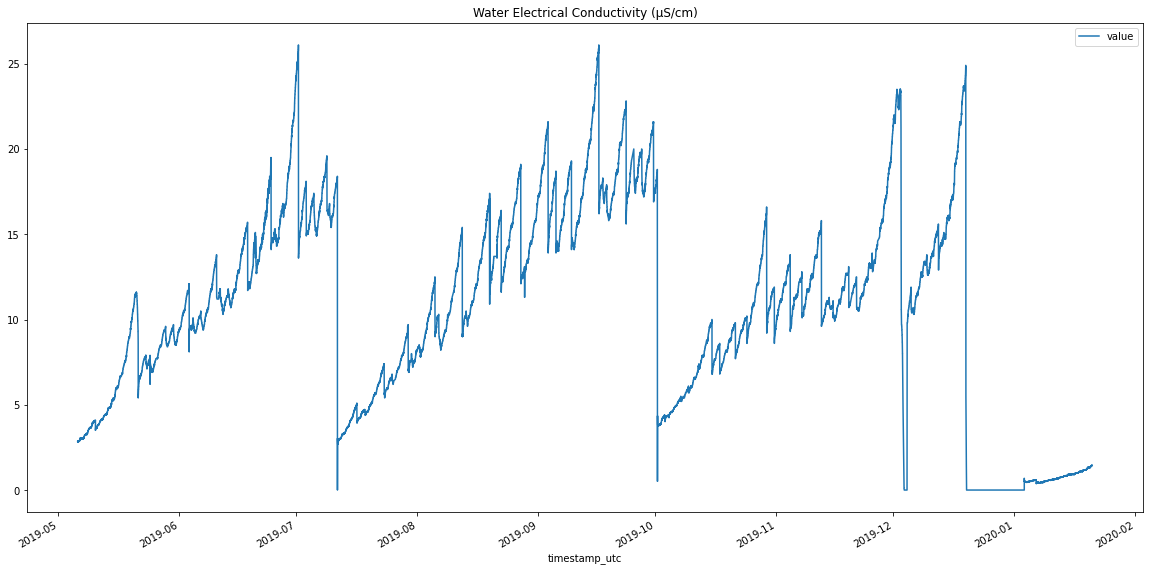

In [26]:
ax = water_ec_ms_cm_df.plot(x='timestamp_utc',y='value', figsize=(20,10), title="Water Electrical Conductivity (µS/cm)")
fig = ax.get_figure()
fig.savefig('../plots/water_ec_plot.png')

Large drops in EC probably corrispond to times that the machine was cleaned and new seedlings were inserted into the PFC.

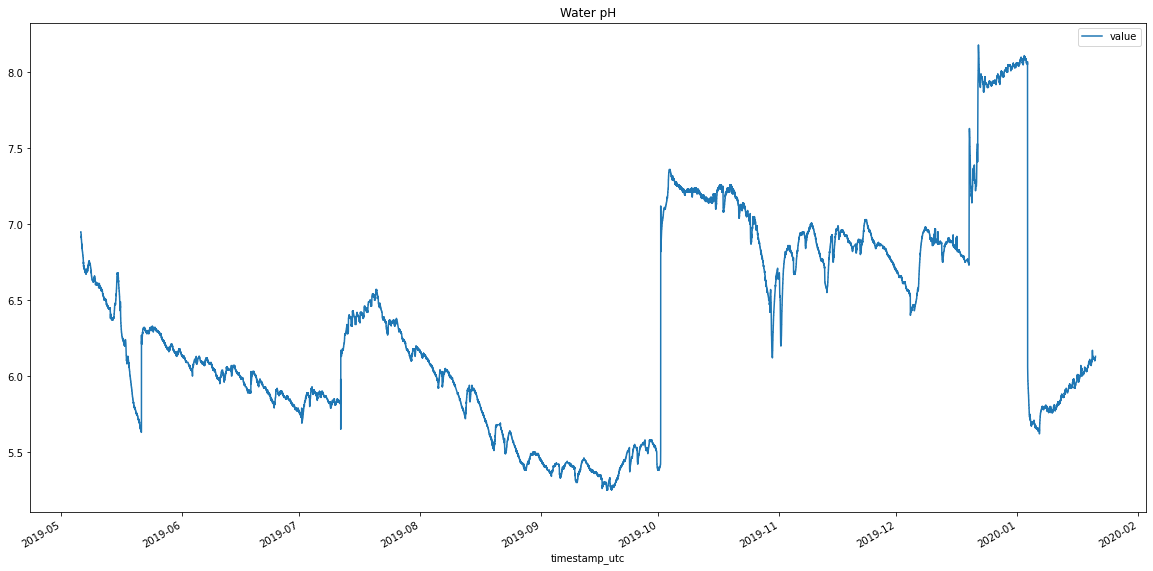

In [27]:
ax = water_pH_df.plot(x='timestamp_utc',y='value', figsize=(20,10), title="Water pH")
fig = ax.get_figure()
fig.savefig('../plots/water_ph_plot.png')

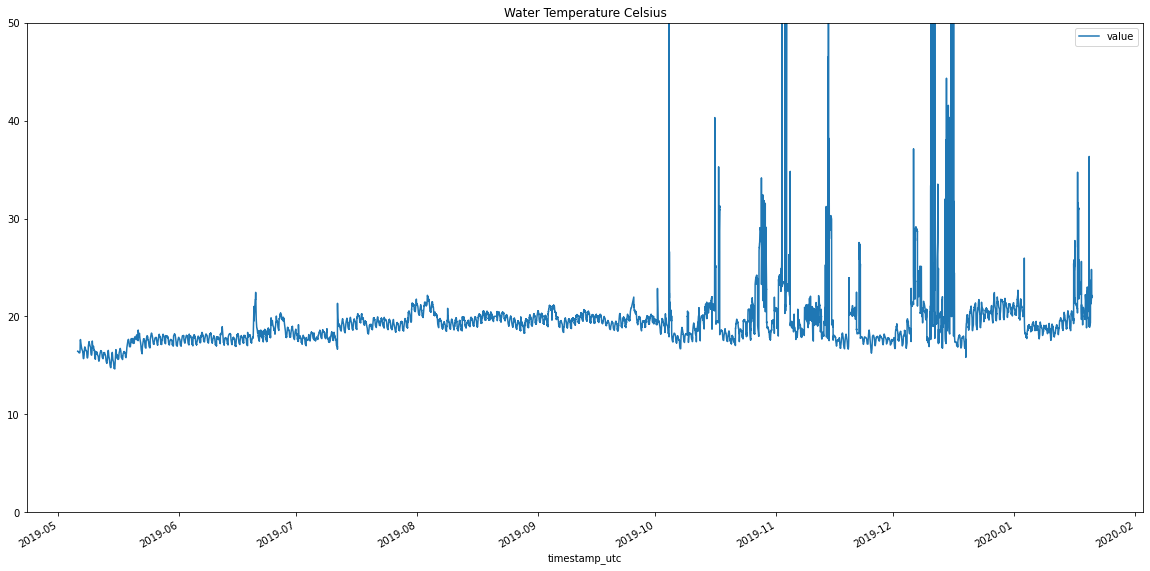

In [31]:
ax = water_temp_C_df.plot(x='timestamp_utc',y='value', figsize=(20,10), title="Water Temperature Celsius")
ax.set_ylim(0,50)
fig = ax.get_figure()
fig.savefig('../plots/water_temp_plot.png')